## Bremerton Sequence through 1997
Relocated using the 3D model in nllox. 

In [ ]:
#Import Libraries

In [1]:
import pygmt
import pandas as pd
import numpy as np
import obspy
# from obspy.imaging.beachball import beachball
import matplotlib.pyplot as plt

In [3]:
# 2D no stat corr
# D2nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2Dnsc.cat')
D2nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2DnscWids.cat')


# 2D w/ Station Corrections
# D2sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2Dsc.cat')
D2sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2DscWids.cat')


# 3D no stat corr
# D3nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3Dnsc.cat')
D3nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3DnscWids.cat')


# 3D w/ Station Corrections
# D3sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3Dsc.cat')
D3sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3DscWids.cat')


#cvm no stat corr
# CVMnsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMnsc.cat')
CVMnsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMnscWids.cat')


# cvm w/ Station Corrections 
# CVMsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMsc.cat')
CVMsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMscWids.cat')

# Hypoinverse:
cat = pd.read_csv('/Users/banjo/Projects/nll_pnsn/bremerton/bremUpdated.cat')

# Reid Merrill's relocations 
mvmDD=pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_MVM.cat')

# event_id_s for locations in nlloc 
# event_ids=pd.read_csv('/Users/banjo/Projects/nll_pnsn/NLLoc/test/brem2D/loc/event_ids')

In [ ]:
# Define Paths
# # rcat = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUpQC.cat')
# # rcatSC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUpSC_QC.cat')
# rcatCVM = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_cvmQC.cat')
# rcatCVMSC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_cvmQCSC.cat')
# cat = pd.read_csv('/Users/banjo/Projects/nll_pnsn/bremerton/bremUpdated.cat')
# # cat = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUpdated_QC.cat')
# stations = pd.read_csv('/Users/banjo/Projects/nll_pnsn/bremerton/bremUp_GTSRCE.csv')
# rcat = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_1DQC.cat')
# rcatSC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_1DSCQC.cat')

# rcatCVMPSQC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_cvmPSQC.cat')
# rcatCVMPSSCQC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_cvmPSSCQC.cat')



# rcatCVMG = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_cvmPSGQC.cat')

# mvmRe=pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremRelocmvm.cat')

In [ ]:
mvmRe

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_DEGREE_SYMBOL="none")
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")

# r = [-123.0, -122.0, 47.250, 47.75]
r = [-122.80, -122.4, 47.50, 47.75]
# r = [-125.01, -121.4, 41.900, 49.10]

fig.basemap(region=r, projection="M10c",frame="a0.25f")
fig.coast(land="lightgrey", water="lightblue",shorelines=True,borders="a/1p,black")
# fig.basemap(region=r, projection="M10c",map_scale='"g-122.25/47.081+c47.081+w50"')
fig.basemap(region=r, projection="M10c",map_scale='"g-122.638/47.53+c47.53+w10"')


fig.plot(cat.Lon,cat.Lat,
         style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')
# fig.plot([-123.0,-122.0],
#          [47.5,47.5],
#          color = 'red',
#          pen ="1.0p,red")

# fig.plot([-122.5,-122.5],[47.0,48.0],
#         color = 'magenta',pen ="1.0p,magenta")

# fig.plot(x = rcat['mLong'].values, y = rcat['mLat'].values ,style = 'c0.05c', pen = 'blue')
# fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mLat'].values ,style = 'c0.05c', color = 'purple',pen = 'black')
# # fig.plot(x = rcatCVM['mLong'].values, y = rcatCVM['mLat'].values ,style = 'c0.05c', pen = 'red')
# fig.plot(x = rcatCVMSC['mLong'].values, y = rcatCVMSC['mLat'].values ,style = 'c0.05c', color = 'purple',pen = 'red')

# fig.plot(x = rcatCVMG['mLong'].values, y = rcatCVMG['mLat'].values ,style = 'c0.01c', color = 'purple',pen = 'red')

fig.plot(x = rcatCVMPSSCQC['mLong'].values, y = rcatCVMPSSCQC['mLat'].values ,
         style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='PSsc')





# fig.plot(
#     x = stations['lon'].values,
#     y = stations['lat'].values,
# #     sizes=0.5 * 2 ** stn.Lon,
#     cmap = False,
#     style = 't0.2c',
#     color = 'magenta',
# #     label = stns['Station'],
#     pen = 'navy')
fig.legend()
fig.show()
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/bremtestMVRC.png')


In [23]:
def plot_xsec_comp(df1,df2,color1,color2,label1,label2,save):
    
    ''' 
        Function to plot the locations at depth with a NS xsection line and 
        a EW xsection line. 
        EW xsection line is 1 degree 
        NS xsection liune is 0.5 degree. 
        Input: 
            df1: pandas dataframe the catalog 1 of interest
            df2: pandas dataframe  the 2nd catalog of interest
            color1: string matplot lib color for plotting
            color2: string matplot lib color for plotting
            label1: string name of df1
            label2: string name of df2
            save: 1 if you want to save it, 0 if you dont. 
        Returns 3 plots of lat lon and dep 
    '''
    fig = pygmt.Figure()
    pygmt.config(MAP_FRAME_TYPE="plain")
    pygmt.config(MAP_FRAME_AXES='NesW')
    pygmt.config(FORMAT_GEO_MAP="ddd.x")


    ##
    ### Top Left ###
    ##
    r1 = [-123.0,-122.0,0,55.55]
    fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")

    fig.plot(x = df1['mlon'].values, y = df1['mdep'].values,
         style = 'c0.08c',color = color1,pen = 'black',label= label1)

    fig.shift_origin(xshift= "4.5i")
    ##
    ### Top Right ##
    ##
    r1 = [-123.0,-122.0,0,55.55] 
    fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")

    fig.plot(x = df2['mlon'].values, y = df2['mdep'].values,
         style = 'c0.08c',color = color2 ,pen = 'black',label=label2)

    fig.legend()

    fig.shift_origin(xshift= "-4.5i",yshift= "-2.25i")

    ##
    ### Bottom Left ##
    ##

    r3 = [47.25,47.750,0,55.55]

    fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")

    fig.plot(x = df1['mlat'].values, y = df1['mdep'].values,
         style = 'c0.08c',color = color1 ,pen = 'black',label=label1)

    fig.shift_origin(xshift= "4.5i")

    ##
    ##Bottom Right ##
    ##
    r3 = [47.250,47.750,0,55.55]
    fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")

    fig.plot(x = df2['mlat'].values, y = df2['mdep'].values,
         style = 'c0.08c',color = color2 ,pen = 'black',label=label2)

#     fig.show()
    if save == 1:
        fig.savefig('/Users/banjo/Desktop/bremComp/' + label1 +'_vs_'+ label2+'.png')
    else:
        fig.show()
        
    return fig

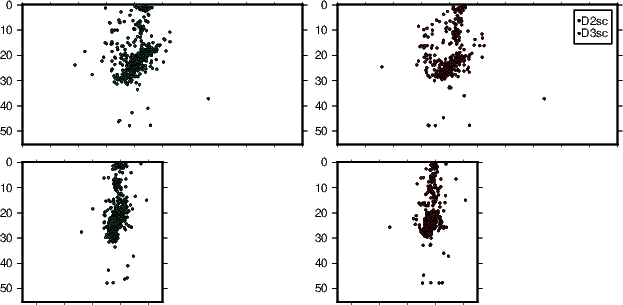

In [24]:
plot_xsec_comp(D2sc,D3sc,'seagreen','firebrick','D2sc','D3sc',0)

In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")


##
### Top Left ###
##
r1 = [-123.0,-122.0,0,55.55]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")

# fig.plot(x = cat['Lon'].values, y = cat['Depth'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')

# fig.plot(x = mvmDD['lon'].values, y = mvmDD['dep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'black',label='mvm')

# fig.plot(x = D2sc['mlon'].values, y = D2sc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='2Dsc')

# fig.plot(x = D3sc['mlon'].values, y = D3sc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='3Dsc')

# fig.plot(x = D2nsc['mlon'].values, y = D2nsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='2Dnsc')

# fig.plot(x = D3nsc['mlon'].values, y = D3nsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='3Dnsc')


# fig.plot(x = CVMsc['mlon'].values, y = CVMsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='CVMsc')

# fig.plot(x = CVMnsc['mlon'].values, y = CVMnsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='CVMnsc')



fig.shift_origin(xshift= "4.5i")

##
### Top Right ##
##
r1 = [-123.0,-122.0,0,55.55] 
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")

# fig.plot(x = mvmDD['lon'].values, y = mvmDD['dep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'black',label='mvm')

# fig.plot(x = D2sc['mlon'].values, y = D2sc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='2Dsc')

# fig.plot(x = D3sc['mlon'].values, y = D3sc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='3Dsc')

# fig.plot(x = D2nsc['mlon'].values, y = D2nsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='2Dnsc')

# fig.plot(x = D3nsc['mlon'].values, y = D3nsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='3Dnsc')


# fig.plot(x = CVMsc['mlon'].values, y = CVMsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='CVMsc')

# fig.plot(x = CVMnsc['mlon'].values, y = CVMnsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='CVMnsc')



fig.legend()

fig.shift_origin(xshift= "-4.5i",yshift= "-2.25i")

##
### Bottom Left ##
##

r3 = [47.25,47.750,0,55.55]
# r3 = [47.250,47.850,0,55.55]

fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")

# fig.plot(x = cat['Lat'].values, y = cat['Depth'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')

# fig.plot(x = mvmDD['lat'].values, y = mvmDD['dep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'black',label='mvm')

# fig.plot(x = D2sc['mlat'].values, y = D2sc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='2Dsc')

# fig.plot(x = D3sc['mlat'].values, y = D3sc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='3Dsc')

# fig.plot(x = D2nsc['mlat'].values, y = D2nsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='2Dnsc')

# fig.plot(x = D3nsc['mlat'].values, y = D3nsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='3Dnsc')

# fig.plot(x = CVMsc['mlat'].values, y = CVMsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='CVMsc')

# fig.plot(x = CVMnsc['mlat'].values, y = CVMnsc['mdep'].values,
#          style = 'c0.08c',color = 'red' ,pen = 'navy',label='CVMnsc')





fig.shift_origin(xshift= "4.5i")

##
##Bottom Right ##
##
r3 = [47.250,47.750,0,55.55]
fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")

# fig.plot(x = D2sc['mlat'].values, y = D2sc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='2Dsc')

# fig.plot(x = D3sc['mlat'].values, y = D3sc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='3Dsc')

# fig.plot(x = D2nsc['mlat'].values, y = D2nsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='2Dnsc')

# fig.plot(x = D3nsc['mlat'].values, y = D3nsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='3Dnsc')


# fig.plot(x = CVMsc['mlat'].values, y = CVMsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='CVMsc')

# fig.plot(x = CVMnsc['mlat'].values, y = CVMnsc['mdep'].values,
#          style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='CVMnsc')


fig.show()
# fig.savefig('/Users/banjo/Desktop/bremComp/hypo_vs_2Dsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/hypo_vs_3Dsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/hypo_vs_3Dnsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/hypo_vs_2Dnsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/hypo_vs_CVMsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/hypo_vs_CVMnsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/2Dsc_vs_3Dsc.png')
# fig.savefig('/Users/banjo/Desktop/bremComp/2Dnsc_vs_3Dnsc.png')




In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")

r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = cat['Lon'].values, y = cat['Depth'].values ,style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')



fig.shift_origin(xshift= "4.5i")
r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = rcatCVMPSQC['mLong'].values, y = rcatCVMPSQC['mDepth'].values ,style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='NLLoc2d')
# fig.plot(x = rcatCVMPSQC['mLong'].values, y = rcatCVMPSQC['mDepth'].values ,style = 'c0.05c',color = 'orange' ,pen = 'black')




fig.legend()

# fig.shift_origin(xshift= "4.5i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatCVM['mLong'].values, y = rcatCVM['mDepth'].values ,style = 'c0.05c',color = 'orange' ,pen = 'black')

fig.shift_origin(xshift= "-4.5i",yshift= "-2.25i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mDepth'].values ,style = 'c0.05c',color = 'purple', pen = 'black')



# r3 = [47.25,47.750,0,55.55] #[-111.96,-111.91,40.45,40.49]
r3 = [47.350,47.850,0,55.55] #[-111.96,-111.91,40.45,40.49]


fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")
fig.plot(x = cat['Lat'].values, y = cat['Depth'].values ,style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')
# fig.plot(x = rcat['mLat'].values, y = rcat['mDepth'].values ,style = 'c0.03c', pen = 'blue')
# fig.plot(x = rcatSC['mLat'].values, y = rcatSC['mDepth'].values ,style = 'c0.03c', pen = 'orange')

# fig.plot(x = rcatCVM['mLat'].values, y = rcatCVM['mDepth'].values ,style = 'c0.03c', pen = 'magenta')

# fig.plot(x = rcatCVMSC['mLat'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.03c', pen = 'brown')


# fig.show()
# fig.savefig('/Users/banjo/Desktop/bremtest3.png')




fig.shift_origin(xshift= "4.5i")
r3 = [47.250,47.750,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")
# fig.plot(x = cat['Lat'].values, y = cat['Depth'].values ,style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')
fig.plot(x = rcatCVMPSQC['mLat'].values, y = rcatCVMPSQC['mDepth'].values ,style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='NLLoc3d')



# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatCVMSC['mLong'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.05c' ,color='red',pen = 'black')

fig.show()
# fig.savefig('/Users/banjo/Desktop/bremUp2dvsHpyo.png')

In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")

r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = rcat['mLong'].values, y = rcat['mDepth'].values ,style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='NLLoc2d')

fig.shift_origin(xshift= "4.5i")
r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = cat['Lon'].values, y = cat['Depth'].values ,style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')




# fig.shift_origin(xshift= "4.5i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatCVM['mLong'].values, y = rcatCVM['mDepth'].values ,style = 'c0.05c',color = 'orange' ,pen = 'black')

# fig.shift_origin(xshift= "-4.5i",yshift= "-2.25i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mDepth'].values ,style = 'c0.05c',color = 'purple', pen = 'black')


# fig.shift_origin(xshift= "4.5i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatCVMSC['mLong'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.05c' ,color='red',pen = 'black')
fig.legend()
fig.show()
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/bremUpdated2x2.png')

In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")

r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = cat['Lon'].values, y = cat['Depth'].values ,style = 'c0.08c',color = 'red' ,pen = 'black',label='Hypo')
# fig.plot(x = rcat['mLong'].values, y = rcat['mDepth'].values ,style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='1DNLL')
# fig.plot(x = rcatCVM['mLong'].values, y = rcatCVM['mDepth'].values ,style = 'c0.05c',color = 'orange' ,pen = 'black')
# fig.plot(x = rcatCVMSC['mLong'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.05c' ,color='red',pen = 'black')
# fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mDepth'].values ,style = 'c0.08c',color = 'yellow', pen = 'black',label='1DNLLSC')
# fig.plot(x = rcatCVMPSSCQC['mLong'].values, y = rcatCVMPSSCQC['mDepth'].values ,style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='PSsc')


# 
fig.plot(x = mvmRe['lon'].values, y = mvmRe['dep'].values ,style = 'c0.08c',color = 'pink' ,pen = 'black',label='mvm')



fig.shift_origin(xshift= "4.5i")
r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatCVM['mLong'].values, y = rcatCVM['mDepth'].values ,style = 'c0.05c',color = 'orange' ,pen = 'black')
# fig.plot(x = rcat['mLong'].values, y = rcat['mDepth'].values ,style = 'c0.05c',color = 'dodgerblue' ,pen = 'navy')
fig.plot(x = rcatCVMPSSCQC['mLong'].values, y = rcatCVMPSSCQC['mDepth'].values ,style = 'c0.08c',color = 'dodgerblue' ,pen = 'navy',label='PSsc')



# fig.shift_origin(xshift= "-4.5i",yshift= "-2.25i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# # fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mDepth'].values ,style = 'c0.05c',color = 'purple', pen = 'black')
# fig.plot(x = cat['Lon'].values, y = cat['Depth'].values ,style = 'c0.05c',color = 'white' ,pen = 'black')



# fig.shift_origin(xshift= "4.5i")
# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = rcatCVMSC['mLong'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.05c' ,color='red',pen = 'black')
# # fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mDepth'].values ,style = 'c0.05c',color = 'purple', pen = 'black')

fig.legend()
fig.show()
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/bremUpdated2x2_catxCVM.png')
# fig.savefig('/Users/banjo/Desktop/bremUpdated2x2_catxCVM.png')

In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")

r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = cat['Lon'].values, y = cat['Depth'].values ,style = 'c0.05c',color = 'white' ,pen = 'black')
fig.shift_origin(xshift= "4.5i")
r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
fig.plot(x = rcat['mLong'].values, y = rcat['mDepth'].values ,style = 'c0.05c', color = 'blue',pen = 'black')
# fig.plot(x = rcatSC['mLong'].values, y = rcatSC['mDepth'].values ,style = 'c0.05c',color = 'purple', pen = 'black')
# fig.plot(x = rcatCVM['mLong'].values, y = rcatCVM['mDepth'].values ,style = 'c0.05c',color = 'orange' ,pen = 'black')
# fig.plot(x = rcatCVMSC['mLong'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.05c' ,color='red',pen = 'black')
fig.show()
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/bremUpdated_catxrcat.png')

In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")

# r1 = [-123.0,-122.0,0,55.55] #[-111.96,-111.91,40.45,40.49]
# fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.plot(x = cat['Lon'].values, y = cat['Depth'].values ,style = 'c0.03c', pen = 'black')
# fig.plot(x = rcat['mLong'].values, y = rcat['mDepth'].values ,style = 'c0.03c', pen = 'blue')
# fig.shift_origin(yshift= "-2.25i")

r3 = [47.25,47.750,0,55.55] #[-111.96,-111.91,40.45,40.49]
fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")
fig.plot(x = cat['Lat'].values, y = cat['Depth'].values ,style = 'c0.03c', pen = 'black')
# fig.plot(x = rcat['mLat'].values, y = rcat['mDepth'].values ,style = 'c0.03c', pen = 'blue')
# fig.plot(x = rcatSC['mLat'].values, y = rcatSC['mDepth'].values ,style = 'c0.03c', pen = 'orange')

# fig.plot(x = rcatCVM['mLat'].values, y = rcatCVM['mDepth'].values ,style = 'c0.03c', pen = 'magenta')

fig.plot(x = rcatCVMSC['mLat'].values, y = rcatCVMSC['mDepth'].values ,style = 'c0.03c', pen = 'brown')


fig.show()
# fig.savefig('/Users/banjo/Desktop/bremtest3.png')

In [ ]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(MAP_FRAME_AXES='NesW')
pygmt.config(FORMAT_GEO_MAP="ddd.x")
# pygmt.config(COLOR_FOREGROUND='black')
# pygmt.config(COLOR_BACKGROUND='black')

# cmap = pygmy.makecpt
r1 = [-125.0,-121.5,0,55] #[-111.96,-111.91,40.45,40.49]
# j1 = '-JX2.5i/-5i'

fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")
# fig.coast(land='grey')
 
# fig.basemap(region=r1,projection="-JX2i/-2i",frame="a0.5f")

# fig.plot(x = cat['LON'].values, y = cat['DEP'].values ,style = 'c0.03c', pen = 'black')
# fig.plot(x = cat2['mlon'].values, y = cat2['mdep'].values ,style = 'c0.03c', pen = 'red')
# fig.plot(x = fix['mLong'].values, y = fix['mDepth'].values ,style = 'c0.03c', pen = 'magenta')
# fig.plot(x = fix['exLong'].values, y = fix['exDepth'].values ,style = 'c0.03c', pen = 'green')
fig.plot(x = ['exLong'].values, y = fix['exDepth'].values ,style = 'c0.03c', pen = 'green')
fig.plot(x = fix['mLong'].values, y = fix['mDepth'].values ,style = 'c0.03c', pen = 'magenta')





fig.plot(x = cat3['mlon'].values, y = cat3['mdep'].values ,style = 'c0.03c', pen = 'blue')
fig.plot(x = cat4['lon'].values, y = cat4['dep'].values ,style = 'c0.03c', pen = 'dodgerblue')


fig.shift_origin(yshift= "-2.25i")

r3 = [47.0,48.0,0,55.5] #[-111.96,-111.91,40.45,40.49]
# j1 = '-JX2.5i/-5i'

fig.basemap(region=r3,frame="a10.0f -JX4i/-2i -BNseW")
# fig.coast(land='grey')
 
# fig.basemap(region=r1,projection="-JX2i/-2i",frame="a0.5f")

fig.plot(x = cat['LAT'].values, y = cat['DEP'].values ,style = 'c0.03c', pen = 'black')
fig.plot(x = cat2['mlat'].values, y = cat2['mdep'].values ,style = 'c0.03c', pen = 'red')
fig.plot(x = fix['mLat'].values, y = fix['mDepth'].values ,style = 'c0.03c', pen = 'magenta')
fig.plot(x = fix['ExpectLat'].values, y = fix['exDepth'].values ,style = 'c0.03c', pen = 'green')


# # ExpectLat exLong exDepth


fig.plot(x = cat3['mlat'].values, y = cat3['mdep'].values ,style = 'c0.02c', pen = 'blue')
fig.plot(x = cat4['lat'].values, y = cat4['dep'].values ,style = 'c0.03c', pen = 'dodgerblue')


# fig.plot(x = dfS['LON'].values, y = dfS['DEP'].values - 1.5,style = 'a0.1c', color = 'orange',pen = 'black')
# fig.plot(x = dfB['LON'].values, y = dfB['DEP'].values - 1.5,style = 'a0.15c', color = 'orange',pen = '0.25,black')
# fig.plot(x = msLon, y = msDep, sizes=[0.5],cmap=False,style="a0.5c",color='red',pen='black')
# fig.text( text = 'A', font = '10p,Helvetica,black', position='TL')
# fig.text( text = 'A', font = '10p,Helvetica,black', position='TR')

##0 4.5 12 0 0 LM A
# 2 4.5 12 0 0 LM A'

fig.show()
# fig.savefig('xRelocOnlyPlain.png')
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/bremtestADRC.png')

In [ ]:
# fig=pygmt.Figure()

# pygmt.config(MAP_FRAME_TYPE="plain")
# pygmt.config(FORMAT_GEO_MAP="ddd.xx")


# fig.coast(
# #     region=[-125.5, -121.4, 45.0, 49.6],
#     region=[-124.0, -121.4, 46.5, 48.5],

# #     region=[-124.0, -120.4, 46.5, 49.0],
#     projection="M6i",
# #     land="navajowhite",
#     land="gray",
#     water="dodgerblue",
#     shorelines=True,
#     resolution="f",
#     frame=True,borders="a/1p,black"
# )
# fig.plot(-polygon['Lat'],polygon['Lon'],pen ="1.0p,black")
# fig.plot(box['Lat'],box['Lon'],pen ="1.0p,red")
# # fig.plot(pnsn_lon,pnsn_lat,
# # #     sizes=0.5 * 2 ** stnLon.values,
# # #     cmap = False,
# #     style = 'a0.5c',
# #     color = 'darkgreen',
# #     pen = 'black')

# fig.plot(
#     x = stns['Lon'].values,
#     y = stns['Lat'].values,
#     sizes=0.5 * 2 ** stns.Lon,
#     cmap = False,
#     style = 't0.2c',
#     color = 'black',
# #     label = stns['Station'],
#     pen = 'black')



# fig.plot(pnsn_lon,pnsn_lat,
# #     sizes=0.5 * 2 ** stnLon.values,
# #     cmap = False,
#     style = 'a0.5c',
#     color = 'red',
#     pen = 'black')


# fig.plot(nloc_lon,nloc_lat,
# #     sizes=0.5 * 2 ** stnLon.values,
# #     cmap = False,
#     style = 'a0.5c',
#     color = 'yellow',
#     pen = 'black')


# fig.plot(pnsn_lon2,pnsn_lat2,
# #     sizes=0.5 * 2 ** stnLon.values,
# #     cmap = False,
#     style = 'a0.5c',
#     color = 'red',
#     pen = 'black')

# fig.plot(nloc_lon2,nloc_lat2,
# #     sizes=0.5 * 2 ** stnLon.values,
# #     cmap = False,
#     style = 'a0.5c',
#     color = 'yellow',
#     pen = 'black')

# #NLLoc Origin
# fig.plot(-124.0,46.5,
# #     sizes=0.5 * 2 ** stnLon.values,
# #     cmap = False,
#     style = '+1i',
#     color = 'black',
#     pen ="6.0p,yellow")

# # fig.plot(nll3d_lon,nll3d_lat,
# #          style = 'a0.5c',
# #     color = 'purple',
# #     pen = 'black')

# fig.show()
# # fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/tests.png')


In [ ]:
# fig = pygmt.Figure()
# # cmap = pygmy.makecpt
# r1 = [-124.5,-120.0,0,1221*.25] 
# # r1 = [42,49,0,1221*.25]
# # j1 = '-JX2.5i/-5i'

# # region=[-125.5, -116.7, 41.5, 49.6],

# fig.basemap(region=r1,frame=" -JX6i/-3i -BWsne ")
# fig.plot(x = cat['Lon'].values, y = cat['Depth'].values,style = 'c0.01c',color = 'black', pen = 'black')
# # fig.text( text = 'A', font = '10p,Helvetica,black', position='TL')
# # fig.text( text = 'A', font = '10p,Helvetica,black', position='TR')

# ##0 4.5 12 0 0 LM A
# # 2 4.5 12 0 0 LM A'

# fig.show()
# # fig.savefig('xRelocOnlyPlain.png')

In [ ]:
# fig=pygmt.Figure()
# pygmt.config(FORMAT_GEO_MAP='D-')
# pygmt.config(MAP_FRAME_TYPE='plain')
# # pygmt.config(PLOT_DEGREE_FORMAT='D-')

# # gmtset BASEMAP_TYPE plain PLOT_DEGREE_FORMAT D- ANOT_FONT_SIZE 9p \
# #        FRAME_PEN 0.5p TICK_LENGTH 0.075i
# # pygmt.makecpt(
# #     cmap='grayC',
# #     series='1000/4000/10',
# #     continuous=True
# # )

# # r1 = [-112.45,-111.35,40.05,41.05]
# r2 = [-112.250,-111.750,40.40,40.80]

# fig.grdimage(topo,region=r2,projection="M5i",cmap='elevation',shading = shade)
# fig.basemap(region=r2,frame=" -JM5i -BWSne")


# fig.coast(shorelines=True,water='dodgerblue')
# fig.plot(
#     x=msLon,
#     y=msLat,
#     sizes=[0.5],
#     cmap=False,
#     style="a0.5c",
#     color='black',
#     pen="black",)

# fig.plot(data=wf,pen ="0.5p,darkred")
# fig.text(x = -111.85, y = 40.55,text = 'Wasatch Fault',font = '8p,Helvetica,black')
# fig.text(x = -111.89, y = 40.75, text = 'Salt Lake City',font = '8p,Helvetica,black')
# fig.text(x =  -111.974444, y = 40.478333, text = 'Bluffdale',font = '8p,Helvetica,black')
# fig.text(x = -112.05, y = 40.755, text = 'West Valley FZ',font = '8p,Helvetica,black')


# ##Single Station Color Plot

# # fig.plot(
# #     x = metadata['lon'].values,
# #     y = metadata['lat'].values,
# #     sizes=0.5 * 2 ** metadata.lon,
# #     cmap = False,
# #     style = 't0.3c',
# #     color = 'black',
# #     pen = 'white',)

# ### END

# ### Station Color Different by Gain

# fig.plot(
#     x = metadata21['lon'].values,
#     y = metadata21['lat'].values,
#     sizes=0.5 * 2 ** metadata21.lon,
#     cmap = False,
#     style = 't0.4c',
#     color = 'dodgerblue',
#     pen = 'black')

# fig.plot(
#     x = metadata20['lon'].values,
#     y = metadata20['lat'].values,
#     sizes=0.5 * 2 ** metadata20.lon,
#     cmap = False,
#     style = 't0.4c',
#     color = 'navy',
#     pen = 'black')

# ### END


# ### plotting Focal Mechanism psmeca 

# strikes = [171,182]
# dips = [57,34]
# rakes = [-101,-52]
# depths = [8.6,11.9]
# magnitudes = [3.7,5.7]
# lats = [msLat,40.751]
# lons = [msLon,-112.078]
# locAs = [msLon + 0.05,-112.178]
# locBs = [msLat + 0.05,40.725]


# for lon, lat, dep, st, dp, rk, mg, locA, locB in zip(lons, lats, depths, strikes, dips, rakes, magnitudes, locAs, locBs):
#     with pygmt.helpers.GMTTempFile() as temp_file: 
#         with open(temp_file.name, 'w') as f:
#             f.write(f'{lon} {lat} {dep} {st} {dp} {rk} {mg} {locA} {locB}') #moment tensor: lon, lat, depth, strike, dip, rake, magnitude
#         with pygmt.clib.Session() as session:
#             session.call_module('meca', f'{temp_file.name} -Sa0.65i -C0.15p  -Glightred')
            
# ### END 

# # 
# fig.show()
# # fig.savefig('/Users/banjo/Desktop/2slcSegMap.png')

In [ ]:
# fig = pygmt.Figure()
# # pygmt.makecpt(cmap="grayC", series=[1000, 4000])
# fig.grdimage(topo,region=[-111.96,-111.91,40.45,40.49],projection="M8i",cmap="grayC",shading = shade)
# fig.basemap(region=[-111.96,-111.91,40.45,40.49], projection="M8i", frame="a")
# # fig.grdimage('@earth_relief_30s',region=[-111.96,-111.91,40.45,40.49],projection="M8i")
# # fig.coast(land="snow2")
# pygmt.makecpt(cmap="seis", series=[data.dep.min(), data.dep.max()])
# fig.plot(
#     x=data.lon,
#     y=data.lat,
#     sizes=0.05 * 2 ** data.mag,
#     color=data.dep,
#     cmap=True,
#     style="cc",
#     pen="black",
# )
# fig.colorbar(frame='af+l"Depth (km)"')

# fig.shift_origin(xshift = -3.5,yshift = 18)

# # fig=pygmt.Figure()
# # fig.grdimage('@earth_relief_30s',region=[-112.25,-111.75,40.45,40.95],projection="M4i")
# fig.basemap(region=[-112.25,-111.75,40.45,40.95], projection="M4i", frame=True)
# fig.grdimage(topo,region=[-112.25,-111.75,40.45,40.95],projection="M4i",cmap='grayC')
# # fig.basemap(region=[-112.25,-111.75,40.45,40.95], projection="M4i", frame=True)
# fig.coast(shorelines=True,water='blue')
# # fig.grdimage('@earth_relief_30s',region=[-112.25,-111.75,40.45,40.95],projection="M4i")
# # pygmt.makecpt(cmap='elevation') #,series = [-2000/4000/10])
# # fig.coast(shorelines=True,water='blue')
# fig.show()
# # fig.savefig('/Users/banjo/Desktop/Map1.png',show=True)

In [ ]:
# fig=pygmt.Figure()
# pygmt.config(MAP_FRAME_TYPE='plain')
# pygmt.config(FORMAT_GEO_MAP='.xx')
# fig.grdimage('@earth_relief_30s',region=[-114.5,-108.5,36.5,42.5],projection="M3i",cmap='grayC') 
# # fig.basemap(MAP_FRAME_TYPE='plain')
# # fig.basemap(region=[-114.5,-108.5,36.5,42.5], frame="  -JM2i -BWSen")
# fig.basemap(region=[-114.5,-108.5,36.5,42.5], frame=" -JM3i -BWSen  -Lx2.45i/0.35i+c0+w200k")

# # fig.basemap(region=[-114.5,-108.5,36.5,42.5], frame='-R[6/6] -Jx2i -BNEsw ')

# fig.coast(shorelines=True,water='blue')
# fig.coast(borders=[2,"1/1p,black"])
# fig.plot(
#     x=msLon,
#     y=msLat+0.20,
#     sizes=[0.5],
#     cmap=False,
#     style="s0.8c",
#     pen=['1/0.5p','red'],
# )
# fig.plot(data=wf,pen ="0.25p,black")
# fig.text([-111.95,40.47,'Wasatch Fault','12,red'],)
# # fig.image(bb,position="g-112.5/40.0+w1.5c/1.5c")
# # fig.plot(data=prov,pen ="0.5p,white")
# # fig.plot(data=iplat,pen="0.5,white")
# # fig.text(x=-113.48, y = 40.463, text = 'Basin & Range',font = '8p,Helvetica,white')
# # fig.text(x=-110.2,y=41.75,text = 'Rocky Mountains',font = '8p,Helvetica,white')
# # fig.text(x=-109.7,y=37.5,text = 'Colorado Plateu',font = '8p,Helvetica,white')
# fig.show()

In [ ]:
# fig=pygmt.Figure()

# fig.grdimage('@earth_relief_30s',region=[-114.5,-108.5,36.5,42.5],projection="M5i",cmap='grayC') 
# fig.basemap(region=[-114.5,-108.5,36.5,42.5], projection="M5i", frame=True)
# fig.basemap(region=[-114.5,-108.5,36.5,42.5], frame=' -JM2i -BNEsw ')
# fig.coast(shorelines=True,water='blue')
# fig.coast(borders=[2,"2/1p,black"])
# fig.plot(
#     x=msLon,
#     y=msLat+0.20,
#     sizes=[0.5],
#     cmap=False,
#     style="s2c",
#     pen=['1/0.5p','red'],
# )
# fig.plot(data=wf,pen ="0.5p,black")
# # fig.text([-111.95,40.47,'Wasatch Fault','12,red'],)
# # fig.image(bb,position="g-112.5/40.0+w1.5c/1.5c")
# fig.plot(data=prov,pen ="0.5p,white")
# fig.plot(data=iplat,pen="0.5,white")
# fig.text(x=-113.48, y = 40.463, text = 'Basin & Range',font = '12p,Helvetica,white')
# fig.text(x=-110.2,y=41.75,text = 'Rocky Mountains',font = '12p,Helvetica,white')
# fig.text(x=-109.7,y=37.5,text = 'Colorado Plateu',font = '12p,Helvetica,white')
# fig.show()



# fig.shift_origin(xshift = "7i")

# fig.grdimage('@earth_relief_15s',region=[-112.25,-111.55,40.25,40.95],projection="M5i",cmap='terra')
# fig.basemap(region=[-112.25,-111.55,40.25,40.95], projection="M5i", frame='a')
# fig.coast(shorelines=True,water='blue')
# fig.plot(
#     x=msLon,
#     y=msLat,
#     sizes=[0.5],
#     cmap=False,
#     style="a1c",
#     color='red',
#     pen="black",)
# # x = 0
# # y = 0
# fig.plot(
#     x = metadata['lon'].values,
#     y = metadata['lat'].values,
#     sizes=0.5 * 2 ** metadata.lon,
#     cmap = False,
#     style = 't0.3.5c',
#     color = 'black',
#     pen = 'white',)
# fig.plot(data=wf,pen ="1.5p,black")
# fig.text(x=-111.75,y=40.515,text = 'Wasatch Fault')
# # fig.image(bb,position="g-112.5/40.0+w1.5i/1.5i")
# fig.show()
# # fig.savefig(path2+'/map1.png')

In [ ]:
# fig=pygmt.Figure()
# fig.grdimage('@earth_relief_15s',region=[-112.25,-111.55,40.35,40.95],projection="M6i",cmap='elevation')
# fig.basemap(region=[-112.25,-111.55,40.35,40.95],frame=' -JM6i -BWSne -Bf')

# fig.coast(shorelines=True,water='blue')
# fig.plot(
#     x=msLon,
#     y=msLat,
#     sizes=[0.5],
#     cmap=False,
#     style="a1c",
#     color='red',
#     pen="black",)
# fig.plot(
#     x = metadata21['lon'].values,
#     y = metadata21['lat'].values,
#     sizes=0.5 * 2 ** metadata21.lon,
#     cmap = False,
#     style = 't0.5c',
#     color = 'navy',
#     pen = 'black')

# fig.plot(
#     x = metadata20['lon'].values,
#     y = metadata20['lat'].values,
#     sizes=0.5 * 2 ** metadata20.lon,
#     cmap = False,
#     style = 't0.5c',
#     color = 'red',
#     pen = 'black')

# fig.plot(data=wf,pen ="1.5p,black")
# fig.text(x=-111.75,y=40.515,text = 'Wasatch Fault')
# fig.text(x = -111.798056,y = 40.7977222,text = 'Salt Lake City')
# fig.text(x =  -111.974444,y = 40.485333,text = 'Bluffdale')

# fig.image(bb,position="g-112/40.42+w2.5i/2.5i")
# # fig.
# fig.shift_origin(xshift = "4i",yshift= "5.28i")

# # fig.grdimage('@earth_relief_30s',region=[-114.5,-108.5,36.5,42.5],projection="M2i",cmap='grayC') 
# fig.basemap(region=[-114.5,-108.5,36.5,42.5], frame=' -JM2i -BNEsw ')
# fig.coast(shorelines=True,water='blue',land = 'gray')
# fig.coast(borders=[2,"2/1p,black"])
# fig.plot(
#     x=msLon,
#     y=msLat+0.20,
#     sizes=[0.5],
#     cmap=False,
#     style="s1c",
#     pen=['0.5p','red'],
# )
# fig.plot(data=wf,pen ="0.5p,black")
# # fig.text([-111.95,40.47,'Wasatch Fault','12,red'],)
# # fig.image(bb,position="g-112.5/40.0+w1.5c/1.5c")
# # fig.plot(data=prov,pen ="0.5p,white")
# # fig.plot(data=iplat,pen="0.5,white")
# # fig.text(x=-113.48, y = 40.463, text = 'Basin & Range',font = '8p,Helvetica,white')
# fig.text(x=-110.48, y = 39.5, text = 'Utah',font = '8p,Helvetica,black')
# # fig.text(x=-110.2,y=41.4,text = 'Rocky Mountains',font = '8p,Helvetica,white')
# fig.text(x=-110.12,y=41.8,text = 'Wyoming',font = '8p,Helvetica,black')

# # fig.text(x=-109.7,y=37.5,text = 'Colorado Plateu',font = '8p,Helvetica,white')
# fig.show()


# fig.show()
# # fig.savefig(path2+'/map2.png')

In [ ]:
#pstext $rflag $jflag -O -P -K << EOF >> $psname
# #-1 40 15 0 0 CM BR
# #EOF

# psxy $rflag $jflag -P -O -K -N -L -W1 -Sa0.2 -Gblack << EOF >> $psname
# -111.948 40.463
# EOF
# #pstext $rflag $jflag -O -P -K << EOF >> $psname
# #-109.7 37.5 15 0 0 CM CP
# #EOF

# #pstext $rflag $jflag -O -P -K << EOF >> $psname
# #-111.2 40.75 15 0 0 CM RM
#EOF

## BEach Ball Plot from Obspy to overlay on Map 

In [ ]:
# mt = [171 ,57 ,-101 ]
# b = beachball(mt, size=10, linewidth=1, facecolor='dodgerblue')
# b.savefig(path2+'/bchbllMshk.eps')

In [ ]:
# fig=pygmt.Figure()

# fig.grdimage('@earth_relief_30s',region=[-114.5,-108.5,36.5,42.5],projection="M5i",cmap='grayC') 

# fig.basemap(region=[-114.5,-108.5,36.5,42.5], projection="M5i", frame=True)

# fig.coast(shorelines=True,water='blue')

# fig.coast(borders=[2,"1/1p,black"])

# fig.plot(
#     x=msLon,
    
#     y=msLat+0.20,
    
#     sizes=[0.5],
    
#     cmap=False,
    
# #     style="a1c",
#     style='s1.5c',
#     pen=['1/0.5p','red'])
    
# #     color='red',
# #     pen="red")

# # fig.shift_origin(xshift = "7i")

# # fig.grdimage('@earth_relief_30s',region=[-112.25,-111.75,40.35,40.850],projection="M5i",cmap='grayC')
# # fig.basemap(region=[-112.25,-111.75,40.35,40.850], projection="M5i", frame=True)
# # fig.coast(shorelines=True,water='blue')
# # fig.coast(borders=[2,"1/1p,black"])
# # fig.plot(
# #     x=msLon,
# #     y=msLat,
# #     sizes=[0.5],
# #     cmap=False,
# #     style="s0.8c",
# #     pen=['1/0.5p','red'])

# # fig.plot(
# #     x = metadata['lon'].values,
# #     y = metadata['lat'].values,
# #     sizes=0.5 * 2 ** metadata.lon,
# #     cmap = False,
# #     style = 't0.5c',
# #     color = 'black',
# #     pen = 'black',
# #     pen=['1/0.5p','red'])


# # # fig.shift_origin(xshift = "7i")
    
# # # fig.grdimage('@earth_relief_30s',region=[-114.5,-108.5,36.5,42.5],projection="M5i",cmap='grayC') 
# # # fig.basemap(region=[-114.5,-108.5,36.5,42.5], projection="M5i", frame=True)
# # # fig.coast(shorelines=True,water='blue')
# # # fig.coast(borders=[2,"1/1p,black"])
# # # fig.plot(
# # #     x=msLon,
# # #     y=msLat+0.20,
# # #     sizes=[0.5],
# # #     cmap=False,
# # #     style="a1c",
# #     color='red',
# #     pen="red")
# # fig.plot(
# #     x = metadata['lon'].values,
# #     y = metadata['lat'].values,
# #     sizes=0.5 * 2 ** metadata.lon,
# #     cmap = False,
# #     style = 't0.5c',
# #     color = 'black',
# #     pen = 'black',)
    
# fig.show()